In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

C:\Users\Lakshya\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv('CC GENERAL.csv')

In [3]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
ne=pd.DataFrame()
ne['CUST_ID']=df['CUST_ID']
ne['MONTHLY AVG PURCHASE']=df['PURCHASES']/12
ne['AVG AMOUNT PER PURCHASE']=df['PURCHASES']/(df['ONEOFF_PURCHASES']+df['INSTALLMENTS_PURCHASES'])
ne['PAYMENT_TO_MIN_PAYMENT']=df['PAYMENTS']/df['MINIMUM_PAYMENTS']
ne['CASH ADV TRX']=df['CASH_ADVANCE_TRX']
ne['CASH_ADVANCE']=df['CASH_ADVANCE']
ne['CUST_ID']=[int(x[1:]) for x in ne['CUST_ID']]

ne

,CUST_ID,MONTHLY AVG PURCHASE,AVG AMOUNT PER PURCHASE,PAYMENT_TO_MIN_PAYMENT,CASH ADV TRX,CASH_ADVANCE
0,10001,7.950000,1.0,1.446508,0,0.000000
1,10002,0.000000,NaN,3.826241,4,6442.945483
2,10003,64.430833,1.0,0.991682,0,0.000000
3,10004,124.916667,1.0,NaN,1,205.788017
4,10005,1.333333,1.0,2.771075,0,0.000000
...,...,...,...,...,...,...
8945,19186,24.260000,1.0,6.660231,0,0.000000
8946,19187,25.000000,1.0,NaN,0,0.000000
8947,19188,12.033333,1.0,0.986076,0,0.000000
8948,19189,0.000000,NaN,0.942505,2,36.558778


In [6]:
ne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CUST_ID                  8950 non-null   int64  
 1   MONTHLY AVG PURCHASE     8950 non-null   float64
 2   AVG AMOUNT PER PURCHASE  6908 non-null   float64
 3   PAYMENT_TO_MIN_PAYMENT   8637 non-null   float64
 4   CASH ADV TRX             8950 non-null   int64  
 5   CASH_ADVANCE             8950 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 419.7 KB


In [7]:
len(df[df['ONEOFF_PURCHASES']==0.0])

4302

In [8]:
len(df[df['INSTALLMENTS_PURCHASES']==0])

3916

In [9]:
ne.PAYMENT_TO_MIN_PAYMENT.fillna(ne.PAYMENT_TO_MIN_PAYMENT.mean(), inplace=True)

In [10]:
ne.dropna(inplace=True)

In [11]:
ne.reset_index(inplace=True)
ne.drop('index', axis=1, inplace=True)

In [12]:
ne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6908 entries, 0 to 6907
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CUST_ID                  6908 non-null   int64  
 1   MONTHLY AVG PURCHASE     6908 non-null   float64
 2   AVG AMOUNT PER PURCHASE  6908 non-null   float64
 3   PAYMENT_TO_MIN_PAYMENT   6908 non-null   float64
 4   CASH ADV TRX             6908 non-null   int64  
 5   CASH_ADVANCE             6908 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 323.9 KB


In [13]:
8950-6908

2042

# Identifying top-10 % customers based on given parameters

In [14]:
x=int(len(ne)*0.1)

In [15]:
top_10_monthly_avg_pur=ne.sort_values('MONTHLY AVG PURCHASE', ascending=False)
top_10_monthly_avg_pur=top_10_monthly_avg_pur.head(x)
top_10_monthly_avg_pur

,CUST_ID,MONTHLY AVG PURCHASE,AVG AMOUNT PER PURCHASE,PAYMENT_TO_MIN_PAYMENT,CASH ADV TRX,CASH_ADVANCE
444,10574,4086.630833,1.0,15.779927,1,558.166886
400,10523,3420.866667,1.0,2.266285,0,0.000000
1002,11300,3336.725833,1.0,48.322062,0,0.000000
1295,11657,3241.892500,1.0,50.058997,0,0.000000
3086,14048,2927.596667,1.0,37.674226,0,0.000000
...,...,...,...,...,...,...
4143,15490,254.206667,1.0,0.778133,5,2127.489462
2317,13013,254.033333,1.0,3.445856,1,119.336811
1914,12474,253.716667,1.0,27.006805,1,684.269093
1919,12479,253.506667,1.0,11.205822,0,0.000000


In [16]:
top_10_adv_cash=ne.sort_values('CASH_ADVANCE', ascending=False)
top_10_adv_cash=top_10_adv_cash.head(x)
top_10_adv_cash

,CUST_ID,MONTHLY AVG PURCHASE,AVG AMOUNT PER PURCHASE,PAYMENT_TO_MIN_PAYMENT,CASH ADV TRX,CASH_ADVANCE
1725,12226,35.994167,1.0,7.239032,123,47137.211760
846,11094,309.916667,1.0,3.844901,26,29282.109150
57,10074,376.939167,1.0,25.503079,27,27296.485760
5586,17450,145.888333,1.0,18.439154,10,26268.699890
2987,13914,416.316667,1.0,0.961538,36,20712.670080
...,...,...,...,...,...,...
494,10638,142.520000,1.0,0.489149,6,2292.800636
1554,12002,23.333333,1.0,14.816774,2,2276.320971
3299,14348,18.366667,1.0,1.060485,11,2274.848149
6776,19024,26.666667,1.0,0.732560,9,2271.859787


In [17]:
one_off=df[df.ONEOFF_PURCHASES>0.0]
installments=df[df.INSTALLMENTS_PURCHASES>0.0]

In [18]:
top_10_avg_amt_per_pur=ne.sort_values('AVG AMOUNT PER PURCHASE', ascending=False)
top_10_avg_amt_per_pur=top_10_avg_amt_per_pur.head(x)
top_10_avg_amt_per_pur

,CUST_ID,MONTHLY AVG PURCHASE,AVG AMOUNT PER PURCHASE,PAYMENT_TO_MIN_PAYMENT,CASH ADV TRX,CASH_ADVANCE
3459,14564,236.169167,1.0,4.418876,0,0.000000
768,11000,91.160833,1.0,0.530022,4,822.700458
2660,13470,91.200833,1.0,7.607580,0,0.000000
6089,18110,119.388333,1.0,7.840925,0,0.000000
828,11073,129.638333,1.0,5.097666,0,0.000000
...,...,...,...,...,...,...
5008,16681,39.340833,1.0,0.741412,0,0.000000
5007,16680,6.125000,1.0,0.432579,0,0.000000
5006,16678,48.688333,1.0,2.290615,0,0.000000
3484,14595,19.270833,1.0,2.203503,0,0.000000


In [19]:
top_10_pay_to_minpay=ne.sort_values('PAYMENT_TO_MIN_PAYMENT', ascending=False)
top_10_pay_to_minpay=top_10_pay_to_minpay.head(x)
top_10_pay_to_minpay

,CUST_ID,MONTHLY AVG PURCHASE,AVG AMOUNT PER PURCHASE,PAYMENT_TO_MIN_PAYMENT,CASH ADV TRX,CASH_ADVANCE
4529,16040,165.468333,1.0,6840.528861,0,0.000000
1586,12041,8.010000,1.0,5367.043208,0,0.000000
6114,18142,9.135000,1.0,4707.141559,0,0.000000
5915,17884,65.491667,1.0,2470.504187,0,0.000000
6189,18231,4.308333,1.0,558.986702,0,0.000000
...,...,...,...,...,...,...
2545,13322,150.716667,1.0,13.586991,3,450.417925
124,10164,606.942500,1.0,13.583788,0,0.000000
2227,12890,92.514167,1.0,13.580992,3,814.088229
3363,14429,70.948333,1.0,13.569117,0,0.000000


In [20]:
ne

,CUST_ID,MONTHLY AVG PURCHASE,AVG AMOUNT PER PURCHASE,PAYMENT_TO_MIN_PAYMENT,CASH ADV TRX,CASH_ADVANCE
0,10001,7.950000,1.0,1.446508,0,0.000000
1,10003,64.430833,1.0,0.991682,0,0.000000
2,10004,124.916667,1.0,9.350070,1,205.788017
3,10005,1.333333,1.0,2.771075,0,0.000000
4,10006,111.106667,1.0,0.581601,0,0.000000
...,...,...,...,...,...,...
6903,19185,84.394167,1.0,9.350070,0,0.000000
6904,19186,24.260000,1.0,6.660231,0,0.000000
6905,19187,25.000000,1.0,9.350070,0,0.000000
6906,19188,12.033333,1.0,0.986076,0,0.000000


In [21]:
ne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6908 entries, 0 to 6907
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CUST_ID                  6908 non-null   int64  
 1   MONTHLY AVG PURCHASE     6908 non-null   float64
 2   AVG AMOUNT PER PURCHASE  6908 non-null   float64
 3   PAYMENT_TO_MIN_PAYMENT   6908 non-null   float64
 4   CASH ADV TRX             6908 non-null   int64  
 5   CASH_ADVANCE             6908 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 323.9 KB


In [22]:
#x=ne[['MONTHLY AVG PURCHASE', 'CASH ADV TRX']]
Scaler=StandardScaler()
x_ss=Scaler.fit_transform(ne)

In [23]:
kmean= KMeans(2)
kmean.fit(x_ss)
labels=kmean.labels_
clusters=pd.concat([ne, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,CUST_ID,MONTHLY AVG PURCHASE,AVG AMOUNT PER PURCHASE,PAYMENT_TO_MIN_PAYMENT,CASH ADV TRX,CASH_ADVANCE,cluster
0,10001,7.950000,1.0,1.446508,0,0.000000,1
1,10003,64.430833,1.0,0.991682,0,0.000000,1
2,10004,124.916667,1.0,9.350070,1,205.788017,1
3,10005,1.333333,1.0,2.771075,0,0.000000,1
4,10006,111.106667,1.0,0.581601,0,0.000000,1


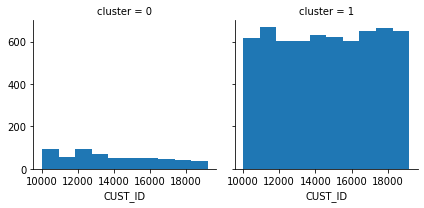

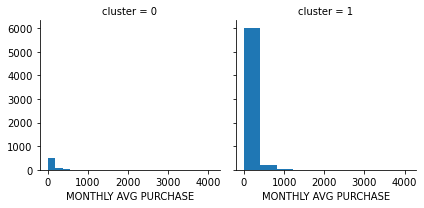

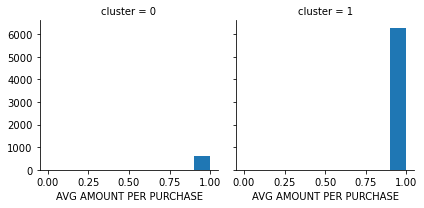

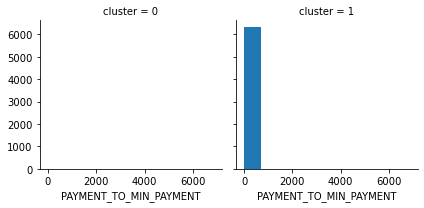

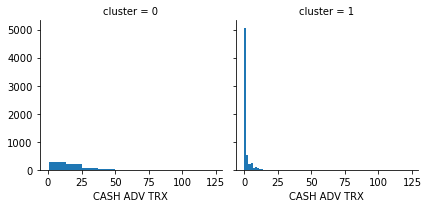

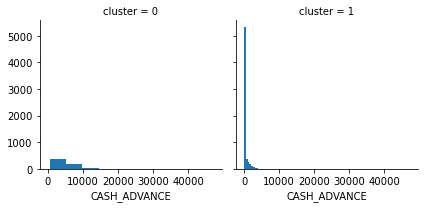

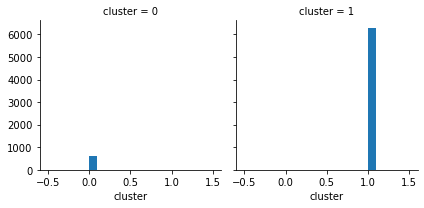

In [24]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

# the differentiating factor is our customer base is Advanced cash deposit by the customer. And based on that we can offer special features to such customers.